In [26]:
import pandas as pd
# 讀取 CSV 檔案到資料框中
df = pd.read_csv('0522_price_volatility_binary_label_ver2.csv')
# 顯示資料框的前幾行
df

stock_symbol                                              title  \
0              ZM  Zoom Video Communications (ZM) Q1 2025 Earning...   
1            PANW  Palo Alto Networks (PANW) Q3 2024 Earnings Cal...   
2             WIX     Wix.com (WIX) Q1 2024 Earnings Call Transcript   
3              LI      Li Auto (LI) Q1 2024 Earnings Call Transcript   
4            GLBE  Global-e Online (GLBE) Q1 2024 Earnings Call T...   
...           ...                                                ...   
3755          UNM  Unum Group (UNM) Q2 2022 Earnings Call Transcript   
3756          ALE      ALLETE (ALE) Q2 2022 Earnings Call Transcript   
3757          CVS  CVS Health (CVS) Q2 2022 Earnings Call Transcript   
3758         LAMR  Lamar Advertising (LAMR) Q2 2022 Earnings Call...   
3759           DT  Dynatrace, Inc. (DT) Q1 2023 Earnings Call Tra...   

            date                                         paragraphs  \
0     2024-05-20  Hello, everyone, and welcome to Zoom's Q1 FY '...   
1     2024-05-20  Good day, everyone, and welcome to Palo Alto N...   
2     2024-05-20  d day, and thank you for standing by. Welcome ...   
3     2024-05-20  lo, ladies and gentlemen. Thank you for standi...   
4     2024-05-20  Welcome to Global-e first quarter 2024 earning...   
...          ...                                                ...   
3755  2022-08-03  Hello, everyone, and welcome to the Unum Group...   
3756  2022-08-03  od day, and welcome to the ALLETE second quart...   
3757  2022-08-03  \nLadies and gentlemen, good morning, and welc...   
3758  2022-08-03  Excuse me, everyone. We now have Sean Reilly a...   
3759  2022-08-03  Greetings, and welcome to Dynatrace first quar...   

      1_day_change_rate  label  
0             -0.003589     -1  
1             -0.037403     -1  
2              0.029639      1  
3             -0.034546     -1  
4             -0.021180     -1  
...                 ...    ...  
3755          -0.020317     -1  
3756          -0.011106     -1  
3757           0.004833      1  
3758          -0.000499     -1  
3759           0.007668      1  

[3760 rows x 6 columns]

In [11]:
df['paragraphs'] = df['paragraphs'].apply(
    lambda x: "".join([paragraph for index, paragraph in enumerate(x.split("\n\n")) if len(paragraph) >= 100])
)

In [6]:
def process_paragraph(paragraph):
    # 尋找 "Image source: The Motley Fool." 並取之後的文字
    truncate_front_index = paragraph.find("Image source: The Motley Fool.")
    if truncate_front_index != -1:
        paragraph = paragraph[truncate_front_index + len("Image source: The Motley Fool.") + 80:]
    # 尋找 "Duration:" 並取之前的文字
    truncate_back_index = paragraph.find("Duration:")
    if truncate_back_index != -1:
        paragraph = paragraph[:truncate_back_index]
    return paragraph

# 對每一行的 paragraphs 欄位進行處理
df['paragraphs'] = df['paragraphs'].apply(process_paragraph)

# 顯示處理後的資料框的前幾行
df[['stock_symbol', 'title', 'date', 'paragraphs']].head()

stock_symbol                                              title        date  \
0         TTWO  Take-Two Interactive Software (TTWO) Q4 2024 E...  2024-05-16   
1         AMAT  Applied Materials (AMAT) Q2 2024 Earnings Call...  2024-05-16   
2          DXC  DXC Technology (DXC) Q4 2024 Earnings Call Tra...  2024-05-16   
3         LSPD  Lightspeed Commerce (LSPD) Q4 2024 Earnings Ca...  2024-05-16   
4           JD       JD.com (JD) Q1 2024 Earnings Call Transcript  2024-05-16   

                                          paragraphs  
0   p.m. ET\n\nOperator\n\nGreetings and welcome ...  
1  perator\n\nWelcome to the Applied Materials ea...  
2  ator\n\nHello, and welcome to the DXC Technolo...  
3  Operator\n\nThank you for standing by, and wel...  
4  , and thank you for standing by for JD.com's f...

In [20]:
paragraphs = df['paragraphs'][0].split("\n\n")

# 找出每個段落長度少於 100 字符的索引
short_paragraphs = [index for index, paragraph in enumerate(paragraphs) if len(paragraph) < 100]

# 顯示對應索引的段落
for index in short_paragraphs:
    print(f"Index: {index}, len: {len(paragraphs[index])}, Paragraph: {paragraphs[index]}")

Index: 0, len: 3, Paragraph:  ET
Index: 1, len: 15, Paragraph: Kelcey McKinley
Index: 3, len: 0, Paragraph: 
Index: 4, len: 0, Paragraph: 
Index: 5, len: 53, Paragraph: Charles Eveslage--Incoming Head of Investor Relations
Index: 9, len: 46, Paragraph: Eric Yuan--Founder and Chief Executive Officer
Index: 21, len: 53, Paragraph: And with that, I'll pass it over to Kelly. Thank you.
Index: 22, len: 42, Paragraph: Kelly Steckelberg--Chief Financial Officer
Index: 39, len: 15, Paragraph: Kelcey McKinley
Index: 41, len: 72, Paragraph: So, our first question will come from Meta Marshall with Morgan Stanley.
Index: 42, len: 40, Paragraph: Meta Marshall--Morgan Stanley -- Analyst
Index: 44, len: 7, Paragraph: Thanks.
Index: 45, len: 42, Paragraph: Kelly Steckelberg--Chief Financial Officer
Index: 48, len: 40, Paragraph: Meta Marshall--Morgan Stanley -- Analyst
Index: 49, len: 31, Paragraph: Great, thanks. I'll pass it on.
Index: 50, len: 15, Paragraph: Kelcey McKinley
Index: 51, len: 67, Para

In [21]:
filtered_paragraphs = [paragraph for index, paragraph in enumerate(paragraphs) if index not in short_paragraphs]
filtered_paragraphs

["Hello, everyone, and welcome to Zoom's Q1 FY '25 earnings webinar. As a reminder, today's webinar is being recorded. And I will now hand things over to Charles Eveslage, incoming head of investor relations. Charles, over to you.",
 "Thank you, Kelcey. Hello, everyone, and welcome to Zoom's earnings video webinar for the first quarter of fiscal year 2025. I'm joined today by Zoom's founder and CEO, Eric Yuan; and Zoom's CFO, Kelly Steckelberg. Our earnings press release was issued today after the market closed and may be downloaded from the investor relations page at investors.zoom.us.",
 "Also, on this page you'll be able to find a copy of today's prepared remarks and a slide deck with financial highlights that, along with our earnings release, include a reconciliation of GAAP to non-GAAP financial results. During this call we will make forward-looking statements, including statements regarding our financial outlook for the second quarter and full fiscal year 2025; our expectations r

In [5]:
filtered_text = "".join(filtered_paragraphs)

# 顯示結果
filtered_text

'Hello, everyone, and welcome to Zoom\'s Q1 FY \'25 earnings webinar. As a reminder, today\'s webinar is being recorded. And I will now hand things over to Charles Eveslage, incoming head of investor relations. Charles, over to you.Thank you, Kelcey. Hello, everyone, and welcome to Zoom\'s earnings video webinar for the first quarter of fiscal year 2025. I\'m joined today by Zoom\'s founder and CEO, Eric Yuan; and Zoom\'s CFO, Kelly Steckelberg. Our earnings press release was issued today after the market closed and may be downloaded from the investor relations page at investors.zoom.us.Also, on this page you\'ll be able to find a copy of today\'s prepared remarks and a slide deck with financial highlights that, along with our earnings release, include a reconciliation of GAAP to non-GAAP financial results. During this call we will make forward-looking statements, including statements regarding our financial outlook for the second quarter and full fiscal year 2025; our expectations reg

In [24]:
index_lengths = [len(index) for index in filtered_paragraphs]
index_lengths

[228,
 358,
 1043,
 155,
 255,
 515,
 776,
 501,
 468,
 490,
 609,
 593,
 537,
 481,
 836,
 360,
 407,
 352,
 464,
 688,
 611,
 540,
 466,
 383,
 398,
 416,
 337,
 429,
 428,
 531,
 154,
 262,
 477,
 437,
 405,
 235,
 362,
 612,
 465,
 189,
 375,
 164,
 424,
 128,
 476,
 376,
 658,
 215,
 332,
 492,
 554,
 297,
 226,
 644,
 259,
 723,
 434,
 184,
 116,
 219,
 312,
 470,
 221,
 387,
 212,
 376,
 327,
 297,
 491,
 407,
 404,
 558,
 402,
 636,
 199,
 593,
 171,
 713,
 638,
 643,
 248,
 326,
 362,
 175,
 573,
 535,
 504,
 287,
 198,
 525,
 449,
 760,
 423,
 560,
 119,
 409,
 943,
 393,
 212,
 334,
 214,
 326,
 311,
 613,
 550,
 340,
 381,
 289,
 504,
 390,
 669,
 161,
 278,
 190]

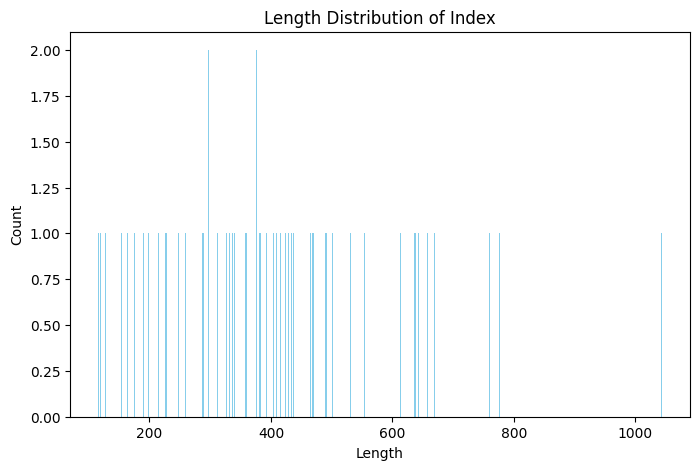

In [25]:
import matplotlib.pyplot as plt

# 計算每個不同字數的索引數量
length_count = {}
for length in index_lengths:
    if length in length_count:
        length_count[length] += 1
    else:
        length_count[length] = 1

# 繪製長度分佈圖表
plt.figure(figsize=(8, 5))
plt.bar(length_count.keys(), length_count.values(), color='skyblue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length Distribution of Index')
plt.show()

In [13]:
df.to_csv('0522_price_volatility_binary_label_ver2.csv', index=False)